In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv
import sys
sys.path.insert(0, '../data_prep')
from export_utils import get_all_export_folders, cleanup_exports_folder

In [3]:
load_dotenv()

True

In [15]:
df = pd.read_csv('film_by_update.csv')
df.head()

,FILM_ID,FILM_TITLE,DAYS_SINCE_LAST_UPDATE
0,f_01ez6,ivans xtc.,196.247918
1,f_07enQ,"20,000 Days on Earth",196.247889
2,f_04VU8,Cabin Fever: Patient Zero,196.247864
3,f_01tmG,The Boston Strangler,196.247845
4,f_0133S,See No Evil,196.247823


In [132]:
n_days = 365
all_dfs = []
all_stats = []
# for update_count in [100]:
for update_count in [50, 100, 125, 150, 175, round(0.01*len(df)), 200, 250, 300, 350, round(0.02*len(df)), 400, 450, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 10000, 15000, len(df)]:
    df2 = df.copy()
    means = [df2['DAYS_SINCE_LAST_UPDATE'].mean()]
    maxs = [df2['DAYS_SINCE_LAST_UPDATE'].max()]
    for i in range(n_days):
        df2['DAYS_SINCE_LAST_UPDATE'] += 1
        df2['DAYS_SINCE_LAST_UPDATE'][:update_count] = 0
        df2 = df2.sort_values('DAYS_SINCE_LAST_UPDATE', ascending=False).reset_index(drop=True)
        means.append(df2['DAYS_SINCE_LAST_UPDATE'].mean())
        maxs.append(df2['DAYS_SINCE_LAST_UPDATE'].max())
    tmp_df = pd.DataFrame(means, columns=['means'])
    tmp_df.insert(0, 'updates_per_day', update_count)
    tmp_df['day'] = range(n_days+1)
    all_dfs.append(tmp_df)
    equilibrium_value = means[-1]
    days_to_hit_equilibrium = np.min(np.where(np.array(means) == equilibrium_value))
    max_value = maxs[-1]
    all_stats.append([update_count, equilibrium_value, days_to_hit_equilibrium, max_value])

C:\Users\tom\AppData\Local\Temp\ipykernel_23076\2183894674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DAYS_SINCE_LAST_UPDATE'][:update_count] = 0
C:\Users\tom\AppData\Local\Temp\ipykernel_23076\2183894674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DAYS_SINCE_LAST_UPDATE'][:update_count] = 0
C:\Users\tom\AppData\Local\Temp\ipykernel_23076\2183894674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['

In [133]:
final_df = pd.concat(all_dfs).reset_index(drop=True)
final_df['hue_text'] = 'upd=' + final_df['updates_per_day'].astype(str)
final_df

,updates_per_day,means,day,hue_text
0,50,79.548076,0,upd=50
1,50,80.042547,1,upd=50
2,50,80.535926,2,upd=50
3,50,81.027819,3,upd=50
4,50,81.517194,4,upd=50
...,...,...,...,...
9877,19509,0.000000,361,upd=19509
9878,19509,0.000000,362,upd=19509
9879,19509,0.000000,363,upd=19509
9880,19509,0.000000,364,upd=19509


<AxesSubplot:xlabel='day', ylabel='means'>

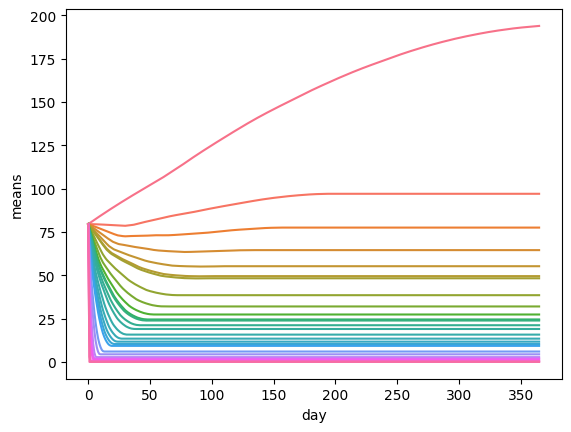

In [134]:
import seaborn as sns
sns.lineplot(data=final_df, x='day', y='means', hue='hue_text', legend=False)

In [135]:
stats_df = pd.DataFrame(all_stats, columns=['update_count', 'equilibrium_value', 'days_to_hit_equilibrium', 'max_value'])
stats_df['percent_of_total'] = stats_df['update_count'] / len(df)
stats_df

,update_count,equilibrium_value,days_to_hit_equilibrium,max_value,percent_of_total
0,50,193.939763,365,370.19622,0.002563
1,100,97.045210,196,195.00000,0.005126
2,125,77.536214,157,156.00000,0.006407
3,150,64.530217,131,130.00000,0.007689
4,175,55.241119,112,111.00000,0.008970
5,195,49.523297,101,100.00000,0.009995
6,200,48.273771,98,97.00000,0.010252
7,250,38.518222,79,78.00000,0.012815
8,300,32.015224,66,65.00000,0.015378
9,350,27.371726,56,55.00000,0.017940


In [5]:
df = pd.read_csv('film_by_key.csv')
df.head()

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,DAYS_SINCE_LAST_UPDATE,SORT_KEY
0,f_0e7x4,Can You Ever Forgive Me?,106855,95.0,98941902.0
1,f_00hqu,Kick-Ass 2,390901,40.0,98891000.0
2,f_026ow,Naked Lunch,106790,95.0,98881716.0
3,f_01eww,She's Out of My League,119735,88.0,98842820.0
4,f_067lG,The Man from U.N.C.L.E.,390602,40.0,98815358.0


In [18]:
FILM_WATCH_COUNT_POWER = 1
DAYS_SINCE_LAST_UPDATE_POWER = 1.5

def calc_sort_key(film_watch_count, days_since_last_update, film_watch_count_power=FILM_WATCH_COUNT_POWER, days_since_last_update_power=DAYS_SINCE_LAST_UPDATE_POWER):
    return round(film_watch_count**film_watch_count_power * days_since_last_update**days_since_last_update_power)

In [21]:
df

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,DAYS_SINCE_LAST_UPDATE,SORT_KEY
0,f_0e7x4,Can You Ever Forgive Me?,106855,95.0,98941902.0
1,f_00hqu,Kick-Ass 2,390901,40.0,98891000.0
2,f_026ow,Naked Lunch,106790,95.0,98881716.0
3,f_01eww,She's Out of My League,119735,88.0,98842820.0
4,f_067lG,The Man from U.N.C.L.E.,390602,40.0,98815358.0
...,...,...,...,...,...
17897,f_0E8Kq,Summoning Sylvia,1227,0.0,0.0
17898,f_0z4iM,The Deliverance,13375,0.0,0.0
17899,f_01jAe,Ghosts... of the Civil Dead,1894,0.0,0.0
17900,f_0GfGY,All You Need Is Death,1838,0.0,0.0


In [29]:
from tqdm import tqdm
df2 = df.copy()
df2['UPDATE_COUNT'] = 0
n_days = 365
update_count = 100
means = [df2['DAYS_SINCE_LAST_UPDATE'].mean()]
maxs = [df2['DAYS_SINCE_LAST_UPDATE'].max()]
for i in tqdm(range(n_days)):
    df2['DAYS_SINCE_LAST_UPDATE'] += 1
    df2['SORT_KEY'] = df2.apply(lambda row: calc_sort_key(row['FILM_WATCH_COUNT'], row['DAYS_SINCE_LAST_UPDATE']), axis=1)
    df2 = df2.sort_values('SORT_KEY', ascending=False).reset_index(drop=True)
    df2['DAYS_SINCE_LAST_UPDATE'][:update_count] = 0
    df2['UPDATE_COUNT'][:update_count] += 1
    means.append(df2['DAYS_SINCE_LAST_UPDATE'].mean())
    maxs.append(df2['DAYS_SINCE_LAST_UPDATE'].max())
# tmp_df = pd.DataFrame(means, columns=['means'])
# tmp_df.insert(0, 'updates_per_day', update_count)
# tmp_df['day'] = range(n_days+1)
# all_dfs.append(tmp_df)
# equilibrium_value = means[-1]
# days_to_hit_equilibrium = np.min(np.where(np.array(means) == equilibrium_value))
# max_value = maxs[-1]
# all_stats.append([update_count, equilibrium_value, days_to_hit_equilibrium, max_value])

  0%|          | 0/365 [00:00<?, ?it/s]C:\Users\tom\AppData\Local\Temp\ipykernel_33716\1598579219.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DAYS_SINCE_LAST_UPDATE'][:update_count] = 0
C:\Users\tom\AppData\Local\Temp\ipykernel_33716\1598579219.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['UPDATE_COUNT'][:update_count] += 1
  0%|          | 1/365 [00:00<00:43,  8.45it/s]C:\Users\tom\AppData\Local\Temp\ipykernel_33716\1598579219.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

<AxesSubplot:>

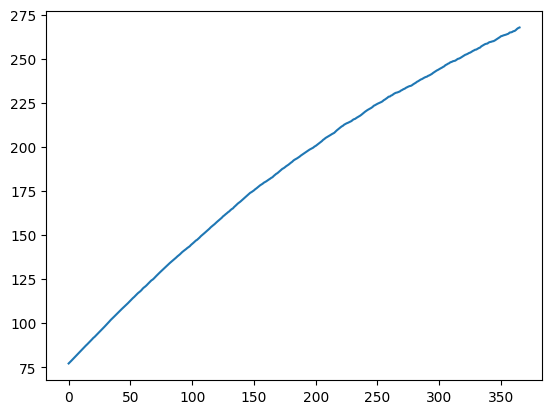

In [30]:
import seaborn as sns
sns.lineplot(means)

In [33]:
df2.groupby('UPDATE_COUNT').agg({'FILM_ID':'count'})

,FILM_ID
UPDATE_COUNT,
0,8982
1,3350
2,1453
3,981
4,858
5,440
6,330
7,271
8,144


In [6]:
all_export_folders = get_all_export_folders()
all_export_folders

['letterboxd-td1138-2023-04-05-09-18-utc',
 'letterboxd-td1138-2023-06-02-14-42-utc',
 'letterboxd-td1138-2023-06-13-16-42-utc',
 'letterboxd-td1138-2023-06-30-14-36-utc',
 'letterboxd-td1138-2023-07-13-09-10-utc',
 'letterboxd-td1138-2023-07-31-23-48-utc',
 'letterboxd-td1138-2023-08-11-16-01-utc',
 'letterboxd-td1138-2023-08-31-09-05-utc',
 'letterboxd-td1138-2023-09-14-23-07-utc',
 'letterboxd-td1138-2023-09-28-16-50-utc',
 'letterboxd-td1138-2023-10-21-21-19-utc',
 'letterboxd-td1138-2023-11-07-17-07-utc',
 'letterboxd-td1138-2024-01-03-17-10-utc',
 'letterboxd-td1138-2024-02-01-23-30-utc',
 'letterboxd-td1138-2024-02-06-09-23-utc',
 'letterboxd-td1138-2024-02-12-08-30-utc',
 'letterboxd-td1138-2024-02-19-08-30-utc',
 'letterboxd-td1138-2024-02-20-08-33-utc',
 'letterboxd-td1138-2024-02-21-08-32-utc',
 'letterboxd-td1138-2024-02-22-08-32-utc',
 'letterboxd-td1138-2024-02-23-08-33-utc']

In [31]:
all_dates = [x.replace('letterboxd-td1138-', '')[:10] for x in all_export_folders]
all_dates = [datetime.strptime(x, '%Y-%m-%d') for x in all_dates]
all_dates

[datetime.datetime(2023, 4, 5, 0, 0),
 datetime.datetime(2023, 6, 2, 0, 0),
 datetime.datetime(2023, 6, 13, 0, 0),
 datetime.datetime(2023, 6, 30, 0, 0),
 datetime.datetime(2023, 7, 13, 0, 0),
 datetime.datetime(2023, 7, 31, 0, 0),
 datetime.datetime(2023, 8, 11, 0, 0),
 datetime.datetime(2023, 8, 31, 0, 0),
 datetime.datetime(2023, 9, 14, 0, 0),
 datetime.datetime(2023, 9, 28, 0, 0),
 datetime.datetime(2023, 10, 21, 0, 0),
 datetime.datetime(2023, 11, 7, 0, 0),
 datetime.datetime(2024, 1, 3, 0, 0),
 datetime.datetime(2024, 2, 1, 0, 0),
 datetime.datetime(2024, 2, 6, 0, 0),
 datetime.datetime(2024, 2, 12, 0, 0),
 datetime.datetime(2024, 2, 19, 0, 0),
 datetime.datetime(2024, 2, 20, 0, 0),
 datetime.datetime(2024, 2, 21, 0, 0),
 datetime.datetime(2024, 2, 22, 0, 0),
 datetime.datetime(2024, 2, 23, 0, 0)]

In [5]:
film_id = 'f_01PYs'

In [28]:
import re
def desensitise_case(film_id):
    film_id_short = film_id.replace('f_', '')
    desensitise_film_id = 'f_' + re.sub('([A-Z]{1})', r'\1_', film_id_short).lower()
    return desensitise_film_id

In [29]:
film_id.replace('f_', '')

'0zxu8'

In [30]:
desensitise_case(film_id)

'f_0zxu8'

In [46]:
import os
from PIL import Image
from tqdm import tqdm
posters_dir = 'C:\\Users\\tom\\Desktop\\dev\\PersonalProjects\\letterboxd-app\\db\\posters'
for film_id_poster_file in tqdm(os.listdir(posters_dir)):
    film_id = film_id_poster_file.replace('.jpg', '')
    film_id_unique = desensitise_case(film_id)
    full_film_path = os.path.join(posters_dir, film_id_poster_file)
    full_film_path_desensitised = os.path.join(posters_dir, film_id_unique + '.jpg')
    if full_film_path == full_film_path_desensitised:
        print('no change')
    else:
        print(full_film_path, full_film_path_desensitised)
        os.rename(full_film_path, full_film_path_desensitised)


100%|██████████| 2629/2629 [00:00<00:00, 38953.72it/s]

no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
C:\Users\tom\Desktop\dev\PersonalProjects\letterboxd-app\db\posters\f_00a_f_4.jpg C:\Users\tom\Desktop\dev\PersonalProjects\letterboxd-app\db\posters\f_00a_4.jpg
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
no change
C:\Users\tom\Desktop\dev\PersonalProjects\letterboxd-app\db\posters\f_00f_ak_.jpg C:\Users\tom\Desktop\dev\PersonalProjects\letterboxd-app\db\posters\f_00ak_.jpg
C:\Users\tom\Des

In [87]:

new_all_dates = all_dates.copy()
diffs = [(new_all_dates[n+1]-x).days for n, x in enumerate(new_all_dates) if n+1 < len(new_all_dates)]

while max([1 if x <7 else 0 for x in diffs]) >0:
    new_all_dates.pop(min([n for n, i in enumerate(diffs) if i < 7]))
    diffs = [(new_all_dates[n+1]-x).days for n, x in enumerate(new_all_dates) if n+1 < len(new_all_dates)]
    print(diffs)
    print(new_all_dates)

[58, 11, 17, 13, 18, 11, 20, 14, 14, 23, 17, 57, 34, 6, 7, 1, 1, 1, 1]
[datetime.datetime(2023, 4, 5, 0, 0), datetime.datetime(2023, 6, 2, 0, 0), datetime.datetime(2023, 6, 13, 0, 0), datetime.datetime(2023, 6, 30, 0, 0), datetime.datetime(2023, 7, 13, 0, 0), datetime.datetime(2023, 7, 31, 0, 0), datetime.datetime(2023, 8, 11, 0, 0), datetime.datetime(2023, 8, 31, 0, 0), datetime.datetime(2023, 9, 14, 0, 0), datetime.datetime(2023, 9, 28, 0, 0), datetime.datetime(2023, 10, 21, 0, 0), datetime.datetime(2023, 11, 7, 0, 0), datetime.datetime(2024, 1, 3, 0, 0), datetime.datetime(2024, 2, 6, 0, 0), datetime.datetime(2024, 2, 12, 0, 0), datetime.datetime(2024, 2, 19, 0, 0), datetime.datetime(2024, 2, 20, 0, 0), datetime.datetime(2024, 2, 21, 0, 0), datetime.datetime(2024, 2, 22, 0, 0), datetime.datetime(2024, 2, 23, 0, 0)]
[58, 11, 17, 13, 18, 11, 20, 14, 14, 23, 17, 57, 40, 7, 1, 1, 1, 1]
[datetime.datetime(2023, 4, 5, 0, 0), datetime.datetime(2023, 6, 2, 0, 0), datetime.datetime(2023, 6, 1

In [89]:
[(x, y) for x, y in zip(new_all_dates, diffs)]

[(datetime.datetime(2023, 4, 5, 0, 0), 58),
 (datetime.datetime(2023, 6, 2, 0, 0), 11),
 (datetime.datetime(2023, 6, 13, 0, 0), 17),
 (datetime.datetime(2023, 6, 30, 0, 0), 13),
 (datetime.datetime(2023, 7, 13, 0, 0), 18),
 (datetime.datetime(2023, 7, 31, 0, 0), 11),
 (datetime.datetime(2023, 8, 11, 0, 0), 20),
 (datetime.datetime(2023, 8, 31, 0, 0), 14),
 (datetime.datetime(2023, 9, 14, 0, 0), 14),
 (datetime.datetime(2023, 9, 28, 0, 0), 23),
 (datetime.datetime(2023, 10, 21, 0, 0), 17),
 (datetime.datetime(2023, 11, 7, 0, 0), 57),
 (datetime.datetime(2024, 1, 3, 0, 0), 40),
 (datetime.datetime(2024, 2, 12, 0, 0), 11)]

In [92]:
diffs_og = [(all_dates[n+1]-x).days for n, x in enumerate(all_dates) if n+1 < len(all_dates)]

[(x, y) for x, y in zip(all_dates, diffs_og)]

[(datetime.datetime(2023, 4, 5, 0, 0), 58),
 (datetime.datetime(2023, 6, 2, 0, 0), 11),
 (datetime.datetime(2023, 6, 13, 0, 0), 17),
 (datetime.datetime(2023, 6, 30, 0, 0), 13),
 (datetime.datetime(2023, 7, 13, 0, 0), 18),
 (datetime.datetime(2023, 7, 31, 0, 0), 11),
 (datetime.datetime(2023, 8, 11, 0, 0), 20),
 (datetime.datetime(2023, 8, 31, 0, 0), 14),
 (datetime.datetime(2023, 9, 14, 0, 0), 14),
 (datetime.datetime(2023, 9, 28, 0, 0), 23),
 (datetime.datetime(2023, 10, 21, 0, 0), 17),
 (datetime.datetime(2023, 11, 7, 0, 0), 57),
 (datetime.datetime(2024, 1, 3, 0, 0), 29),
 (datetime.datetime(2024, 2, 1, 0, 0), 5),
 (datetime.datetime(2024, 2, 6, 0, 0), 6),
 (datetime.datetime(2024, 2, 12, 0, 0), 7),
 (datetime.datetime(2024, 2, 19, 0, 0), 1),
 (datetime.datetime(2024, 2, 20, 0, 0), 1),
 (datetime.datetime(2024, 2, 21, 0, 0), 1),
 (datetime.datetime(2024, 2, 22, 0, 0), 1)]

In [94]:
family = ['Mum', 'Dad', 'Tom', 'Max', 'Carla', 'Alice']
contestants = ['Gill', 'Illiyin', 'Hazel', 'Christiaan', 'Andy', 'Mike', 'John', 'Jeff', 'Sumayah', 'Dylan', 'Georgie', 'Nelly']
c2 = contestants

from random import sample
fam_dict = {x:[] for x in family}
for pick in [1, 2]:
    for person in sample(family, len(family)):
        done = 0
        while done < 1:
            contestant = sample(c2, 1)[0]
            if contestant not in fam_dict[person]:
                fam_dict[person].append(contestant)
                c2.pop(c2.index(contestant))
                done = 1
                print('{} pick {} is {}'.format(person, pick, contestant))
fam_dict


Carla pick 1 is Sumayah
Dad pick 1 is Nelly
Mum pick 1 is Illiyin
Tom pick 1 is Mike
Max pick 1 is Gill
Alice pick 1 is Hazel
Mum pick 2 is Jeff
Max pick 2 is John
Tom pick 2 is Georgie
Dad pick 2 is Andy
Alice pick 2 is Dylan
Carla pick 2 is Christiaan


{'Mum': ['Illiyin', 'Jeff'],
 'Dad': ['Nelly', 'Andy'],
 'Tom': ['Mike', 'Georgie'],
 'Max': ['Gill', 'John'],
 'Carla': ['Sumayah', 'Christiaan'],
 'Alice': ['Hazel', 'Dylan']}

{'Eden': ['Sarah', 'Paul', 'Toyah'],
 'Jess': ['Paul', 'JB', 'Wynne'],
 'Carla': ['Wynne', 'Same', 'Jamie'],
 'Hannah': ['Chris', 'Tom', 'Nick'],
 'Noah': ['Punam', 'JB', 'Sarah'],
 'Grace': ['Montelle', 'Shane', 'Tasha'],
 'Katie': ['Shane', 'Same', 'Tom'],
 'Alison': ['Jamie', 'Chris', 'Punam'],
 'Judith': ['Toyah', 'Pete', 'Tasha'],
 'Alice': ['Pete', 'Nick', 'Montelle']}